In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Activation
training_data = np.load(r'training_data.npy')

Using TensorFlow backend.


In [2]:
training_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [3]:
training_data.shape

(60000, 28, 28, 1)

In [4]:
Y = np.load(r'training_label.npy') #Here Y are the training labels

In [5]:
Y.shape

(60000,)

In [6]:
X = training_data #Here X is the training data
X.shape

(60000, 28, 28, 1)

In [7]:
X[1,:]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078432],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.1882353 ],
        [0.16862746],
        [0.34117648],
        [0.65882355],
        [0.52156866],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215687],
        [0.53333336],
        [0.85882354],
        [0.84705883],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.8, random_state=0)

In [10]:
rows, cols = 28,28 # basically height and width of images
input_shape = (rows, cols, 1) # this shape will be passed in the model
num_classes = 10 # no of classes

In [11]:
import keras.utils
#Convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [12]:
test_y.shape

(12000, 10)

In [13]:
test_y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [19]:
model = Sequential()

#model architecture 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) # Flattens the input
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128),activation = 'LeakyReLU(alpha = 0.2)')
model.add(Dense(128))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dropout(0.2))
#model.add(Dense(64),activation = 'LeakyReLU(alpha = 0.2)')
#model.add(Dense(64, activation='LeakyReLU(alpha = 0.2)'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

W0721 14:57:10.845773  5672 deprecation_wrapper.py:119] From C:\Users\Mahe\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 14:57:10.865782  5672 deprecation_wrapper.py:119] From C:\Users\Mahe\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
batch_size = 500
epochs = 10
#epochs =20
# training the network
history=model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

W0721 14:57:19.463207  5672 deprecation.py:323] From C:\Users\Mahe\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 174s 5ms/step - loss: 0.8985 - acc: 0.6741 - val_loss: 0.5158 - val_acc: 0.8134
Epoch 2/10
25000/38400 [==================>...........] - ETA: 53s - loss: 0.5189 - acc: 0.8119

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


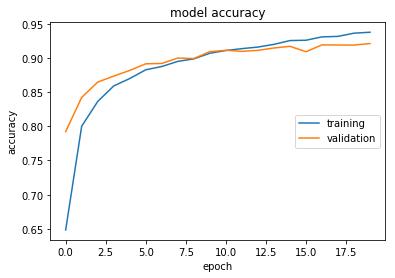

In [22]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()


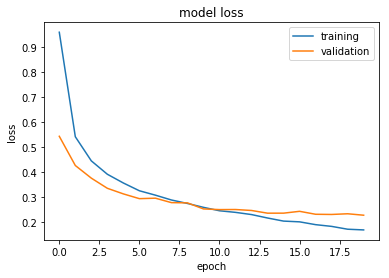

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [24]:
score = model.evaluate(test_X, test_y, verbose=1)
print('loss:', score[0])
print('accuracy:', score[1]) # accuracy on test split

12000/12000 [==============================] - 16s 1ms/step
loss: 0.21820844382047652
accuracy: 0.9201666666666667


In [25]:
print(model.summary()) # model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 128)         0         
__________

In [26]:
data_test = np.load(r'testing_data.npy') # test data

In [27]:
data_test.shape

(10000, 28, 28, 1)

In [28]:
data_test[1,:]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05098039],
        [0.2627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19607843],
        [0.14901961],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.03137255],
        [0.47058824],
        [0.81960785],
        [0.8862745 ],
        [0.96862745],
        [0.92941177],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.96862745],
        

In [29]:
# prediction on test data
prediction = model.predict(data_test)
prediction.shape 

(10000, 10)

In [42]:
prediction[0:3,:]

array([[1.04278570e-06, 2.47192929e-07, 8.83049367e-08, 1.93720280e-06,
        1.53210294e-06, 1.77824550e-04, 9.49401908e-07, 1.20782315e-04,
        7.90426895e-07, 9.99694824e-01],
       [1.43382291e-04, 5.11795217e-10, 9.99548495e-01, 1.74507861e-07,
        1.23325026e-06, 1.67464339e-12, 3.06767091e-04, 1.45769490e-11,
        9.76831416e-09, 1.20556161e-11],
       [1.32578592e-11, 1.00000000e+00, 6.35127221e-16, 7.37831185e-11,
        3.02143239e-13, 2.92583868e-16, 1.55756987e-11, 2.08351709e-17,
        2.47555007e-17, 1.32087765e-17]], dtype=float32)

In [36]:
# getting predicted classes
predicted_classes = np.argmax(np.round(prediction),axis = 1)

In [39]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)